# <a id="#">Task 2 – Image IO, Histograms, Intensity clipping</a>

In [11]:
import numpy
import matplotlib.pyplot as plt
img = plt.imread('data/cells.png')


---

## Image IO

**<a id="#">Task 2.1.</a>** Enter your solution below:

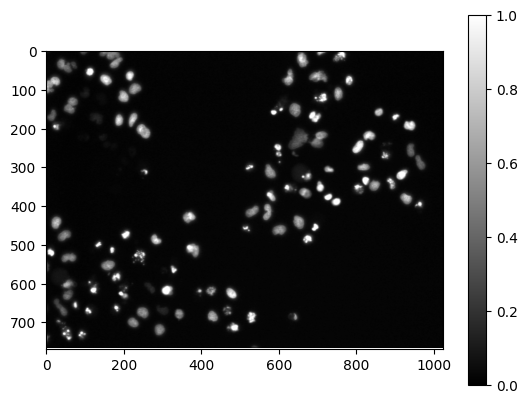

In [12]:
img = plt.imread('data/cells.png') 
plt.imshow(img, 'gray')
plt.colorbar() 

In [13]:
# Check the type of the image
print("Type of image object:", type(img))

# Check the shape (height, width)
print("Shape of the image:", img.shape)

# Check the pixel values
print("Pixel values range from", img.min(), "to", img.max())


Type of image object: <class 'numpy.ndarray'>
Shape of the image: (768, 1024)
Pixel values range from 0.0 to 1.0


---

## Histograms

**<a id="#">Task 2.2.</a>** Enter your solution below:

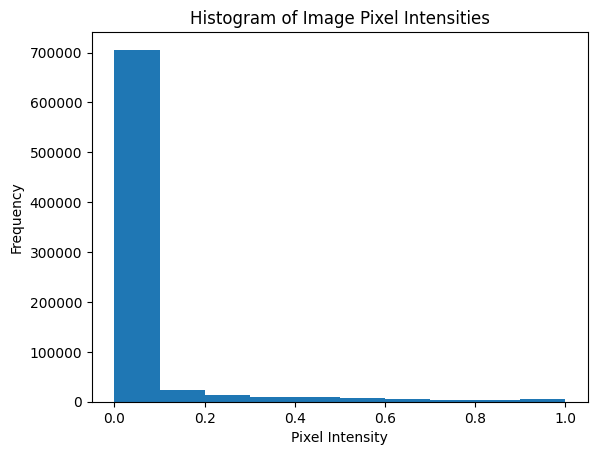

In [14]:
img_flat = img.flatten()

plt.hist(img_flat)  # Adjust bins for better resolution
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Histogram of Image Pixel Intensities')
plt.show()

---

## Intensity clipping

First we define some fixed thresholds $T_1$, $T_2$:

In [15]:
T1 = 0.31
T2 = 0.59



### Using `ndarray.clip` method

**<a id="#">Task 2.3.1.</a>** Enter your solution below:

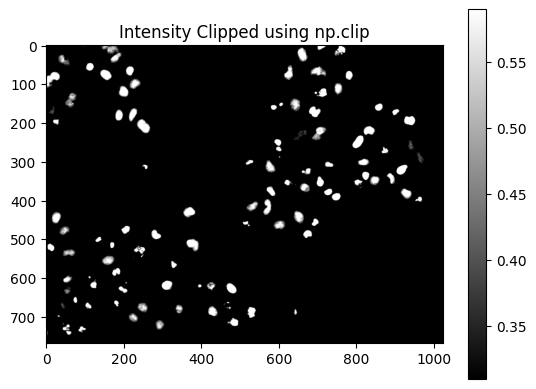

In [16]:
img_clipped = img.clip(T1, T2)

plt.imshow(img_clipped, cmap='gray')
plt.colorbar()
plt.title("Intensity Clipped using np.clip")
plt.show()

### Not using the `ndarray.clip` method

**<a id="#">Task 2.3.2 (a).</a>** Enter your solution below:

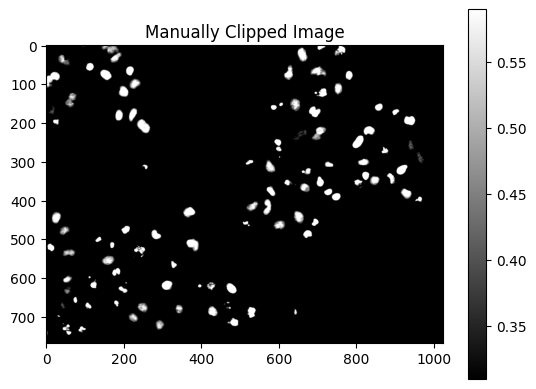

In [17]:
img_manual = img.copy()
for i in range(img.shape[0]):  # Go through rows
    for j in range(img.shape[1]):  # Go through columns
        if img_manual[i, j] < T1:
            img_manual[i, j] = T1  # Too dark? Make it 0.31
        elif img_manual[i, j] > T2:
            img_manual[i, j] = T2  # Too bright? Make it 0.59

plt.imshow(img_manual, cmap='gray')
plt.colorbar()
plt.title("Manually Clipped Image")
plt.show()

**<a id="#">Task 2.3.2 (b).</a>** Enter your solution below:

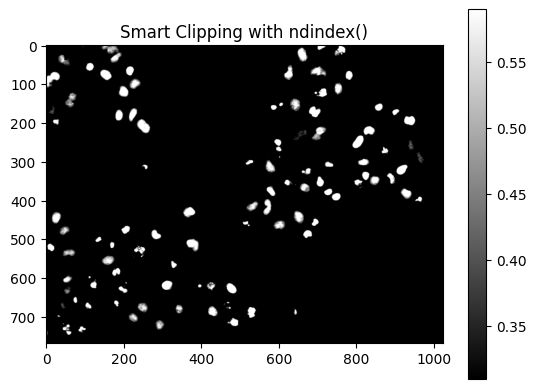

In [18]:
img_smart = img.copy()  

for idx in numpy.ndindex(img.shape):
    if img_smart[idx] < T1:
        img_smart[idx] = T1
    elif img_smart[idx] > T2:
        img_smart[idx] = T2

plt.imshow(img_smart, cmap='gray')
plt.colorbar()
plt.title("Smart Clipping with ndindex()")
plt.show()

---

## Writing re-usable code (bonus)

**<a id="#">Task 2.3.4.</a>** Finish the implementation of the function `clip_image` below, by replacing the comment line (the one which starts with `#`) with your code:

In [19]:
def clip_image(img, T1, T2):
    result = img.copy()  # Ensure the original image is not modified
    for i in numpy.ndindex(img.shape): 
        if img [i[0],i[1]] < T1:
            result [i[0],i[1]] = T1
        elif img [i[0],i[1]] > T2:
           img [i[0],i[1]] = T2 
    return result



**Hints:**
1. The implementation of the function starts after the `def`-line. Any instructions written *(i)* below this line and *(ii)* indented to the right will be run *from top to bottom* whenever you use this function. The execution of the function ends when the last instruction is reached or a `return` statement is encountered.
2. The purpose of the function `clip_image` is that it takes an *input* image `img` (along with two thresholds) and returns an *output* image (the clipped image). Make sure that you do *not* change the original input image!

We are going to check that the solution produced by `clip_img` equals the solution `ndarray.clip` produces. If the image you have loaded is not referenced by the variable `img` in your solution for **Task 2.1**, replace `img` by the name of the variable you used to reference the loaded image:

In [22]:
assert (clip_image(img, T1, T2) == img.clip(T1, T2)).all() # all her bir pixel icin kontrol etmis oluyor

Now, we are going to show the clipping results produced using your `clip_image` implementation for different thresholds (`T1`, `T2`). The code below already shows the results for a pair of *two* thresholds. Supplement the code by adding the result for a *third* pair of thresholds!

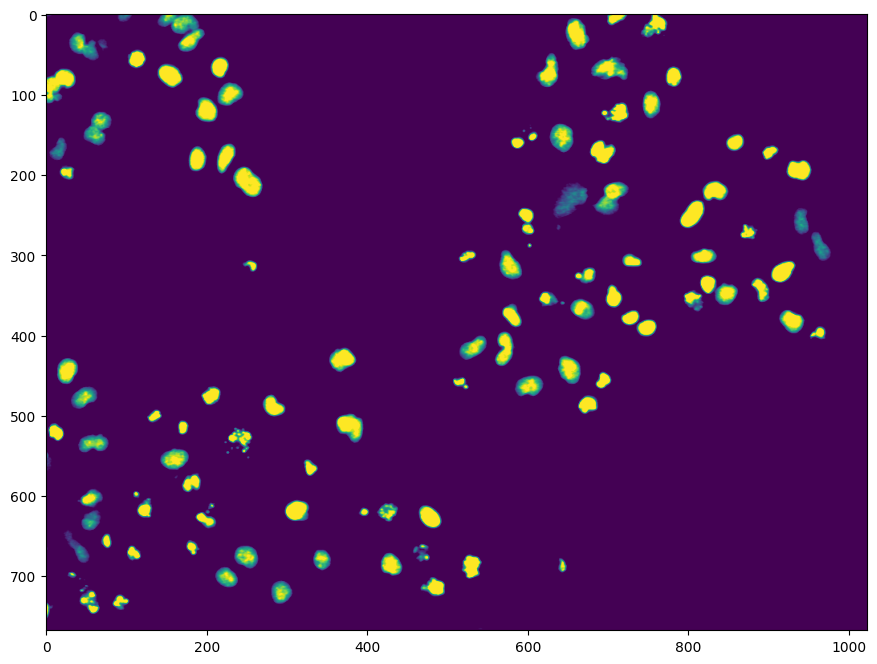

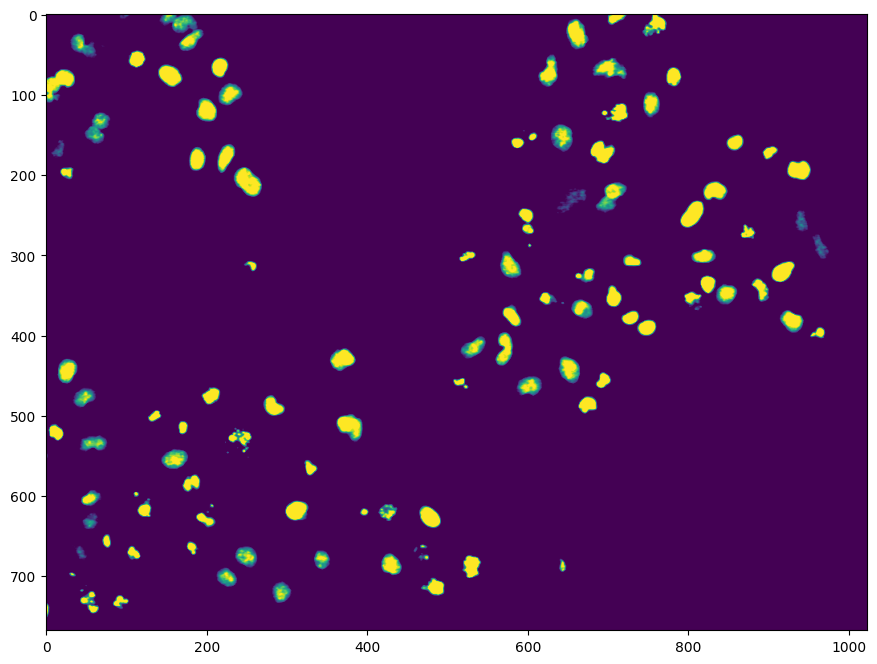

In [23]:
plt.figure(figsize=(15,8))
plt.imshow(clip_image(img, 0.2, 0.8))

plt.figure(figsize=(15,8))
plt.imshow(clip_image(img, 0.3, 0.7))

# here goes your code